<a href="https://colab.research.google.com/github/Rijwan94/DS_Pyhton_M2/blob/main/Global_Terrorism_Dataset_EDA_Rijwan_Shaikh_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Type**    - EDA ( Exploratory data Analysis )
#### **Contribution**    - Individual
#### **Candidate -** Rijwan Adil Shaikh


# **Project Summary -**

Write the summary here within 500-600 words.

In [138]:
from IPython.display import HTML, display

# Define the disclaimer
disclaimer = """
<div id='disclaimer' style='border: 1px solid #ccc; padding: 10px; margin-bottom: 20px;'>
    <strong>Disclaimer about 1993:</strong>
    <p>
        The GTD lacks most terrorism incidents from 1993 due to data loss prior to START’s compilation.
        Despite attempts to recover this data from original sources, only about 15% of estimated 1993 attacks
        were identified. To avoid misinterpretation, 1993 incidents are excluded from analysis.
        However, Appendix II provides country-level statistics based on early reports, and the limited
        1993 data is available for download on the GTD website.
    </p>
</div>
"""

# Display the disclaimer
display(HTML(disclaimer))

# Add reference link in the chart explanation
ref_link = """
<p>
    The year 1993 is not visible in this chart due to data loss.
    <a href="#" onclick="event.preventDefault(); showAlert()">Click here</a> for more information.
</p>

<script>
    function showAlert() {
        alert('The GTD lacks most terrorism incidents from 1993 due to data loss prior to START’s compilation. Despite attempts to recover this data from original sources, only about 15% of estimated 1993 attacks were identified. To avoid misinterpretation, 1993 incidents are excluded from analysis. However, Appendix II provides country-level statistics based on early reports, and the limited 1993 data is available for download on the GTD website.');
    }
</script>
"""

# Display the reference link with pop-up functionality
display(HTML(ref_link))


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [139]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

### Dataset Loading

In [140]:
# Mounting Drive to fetch file
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
#Loading Gloabl Terrorism Database .csv file data into pandas dataframe called as 'global_td_df'
global_td_df = pd.read_csv('/content/drive/MyDrive/Data Science/Module_2 _Numerical_Programming_in_Python/Capstone Project/File_Global Terrorism Data.csv', encoding='latin-1')


<ipython-input-141-f4f2e57de57b>:2: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



### Dataset First View

In [142]:
# Dataset First Look
global_td_df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


### Dataset Rows & Columns count

In [143]:
# Dataset Rows & Columns count
print(f"Rows: {global_td_df.shape[0]}")
print(f"Columns: {global_td_df.shape[1]}")

Rows: 181691
Columns: 135


### Dataset Information

In [144]:
# Dataset Info
global_td_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


# Creating New Dataframe - 'gtd_df' with Required columns only.

1. Renaming only important column for better understanding.

In [145]:
# Define a dictionary with old column names as keys and new column names as values
column_renames = {'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'provstate': 'Province/State',
    'city': 'City',
    'success': 'Success',
    'suicide': 'Suicide',
    'attacktype1_txt': 'Attack Type 1',
    'targtype1_txt': 'Target Type 1',
    'targsubtype1_txt': 'Target Subtype 1',
    'gname': 'Group Name 1',
    'motive': 'Motive',
    'claimmode_txt': 'Claim Mode',
    'weaptype1_txt': 'Weapon Type 1',
    'weapsubtype1_txt': 'Weapon Subtype 1',
    'nkill': 'Number Killed',
    'nwound': 'Number Wounded',
    'ishostkid': 'Is Hostage',
    'ransom': 'Ransom',
    'hostkidoutcome_txt': 'Hostage Outcome',
    'INT_LOG': 'Logistical Status',
    'INT_IDEO': 'Ideological Status'
}

# Rename columns
global_td_df.rename(columns=column_renames, inplace=True)



2. Loading important column to new dataframe- 'gtd_df'

In [146]:
#make new dataframe as 'gtd_df' with reuquired column only
gtd_df = global_td_df[['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State',
                       'City','Success','Suicide', 'Attack Type 1', 'Target Type 1',
                       'Target Subtype 1','Group Name 1', 'Motive', 'Claim Mode',
                       'Weapon Type 1', 'Weapon Subtype 1', 'Number Killed', 'Number Wounded',
                       'Is Hostage', 'Ransom', 'Hostage Outcome', 'Logistical Status',
                       'Ideological Status']]

In [147]:
mean_killed = gtd_df['Number Killed'].mean()
median_killed = gtd_df['Number Killed'].median()
mode_killed = gtd_df['Number Killed'].mode()[0]  #

print(f"Mean: {mean_killed}, Median: {median_killed}, Mode: {mode_killed}")

Mean: 2.4032722986614385, Median: 0.0, Mode: 0.0


3. First view of new dataframe - 'gtd_df'

In [148]:
# Dataset First Look
global_td_df.head(5)

,eventid,Year,Month,Day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,Logistical Status,Ideological Status,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


4. Dataset Rows and Column Count

In [149]:
# Dataset Rows & Columns count
print(f"Rows: {gtd_df.shape[0]}")
print(f"Columns: {gtd_df.shape[1]}")

Rows: 181691
Columns: 24


5. Dataframe 'gtd_df' Information

In [150]:
#Basic Information of our new dataframe
gtd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Year                181691 non-null  int64  
 1   Month               181691 non-null  int64  
 2   Day                 181691 non-null  int64  
 3   Country             181691 non-null  object 
 4   Region              181691 non-null  object 
 5   Province/State      181270 non-null  object 
 6   City                181256 non-null  object 
 7   Success             181691 non-null  int64  
 8   Suicide             181691 non-null  int64  
 9   Attack Type 1       181691 non-null  object 
 10  Target Type 1       181691 non-null  object 
 11  Target Subtype 1    171318 non-null  object 
 12  Group Name 1        181691 non-null  object 
 13  Motive              50561 non-null   object 
 14  Claim Mode          19083 non-null   object 
 15  Weapon Type 1       181691 non-nul

#### Duplicate Values

In [151]:
# Dataset Duplicate Value Count
gtd_df.duplicated().sum()

12449


### **Missing Values/Null Values**

In [152]:
# Missing Values/Null Values Count
gtd_df.isnull().sum()

,0
Year,0
Month,0
Day,0
Country,0
Region,0
Province/State,421
City,435
Success,0
Suicide,0
Attack Type 1,0


<ipython-input-153-c3f65fa456cc>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




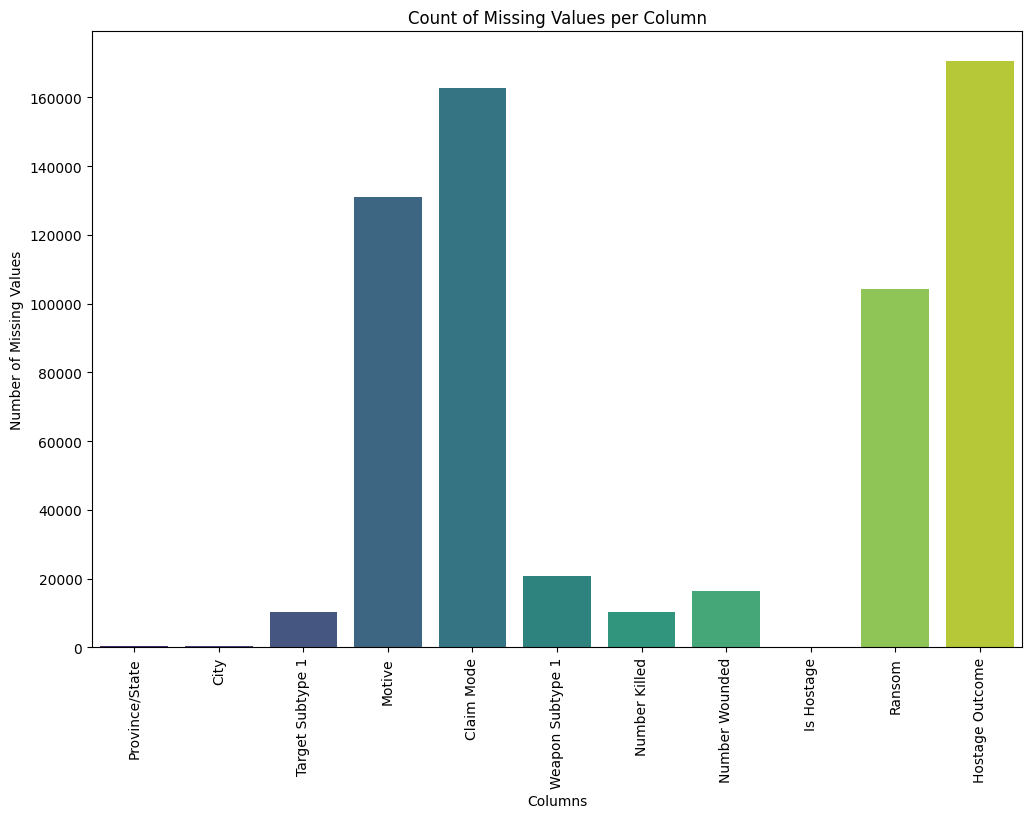

In [153]:
# Visualizing the missing values
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the count of missing values per column
missing_values_count = gtd_df.isnull().sum()

# Filter out columns with no missing values
missing_values_count = missing_values_count[missing_values_count > 0]

# Create a bar plot for missing values
plt.figure(figsize=(12, 8))
sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette='viridis')
plt.xticks(rotation=90)  # Rotate column names for better readability
plt.title('Count of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()

### Columns to Handle with NaN/Null
#### Province/State,  City,  Target Subtype1,  Motive,  Claim Mode,  Weapon Subtype 1,  Number Killed,  Number Wounded,  Is Hostage,  Ransom,  Hostage Outcome.

In [154]:
# Fill NaN values in Province/State column as 'Unknown'
gtd_df['Province/State'] = gtd_df['Province/State'].fillna('Unknown')

# Fill NaN values in City column as 'Unknown'
gtd_df['City'] = gtd_df['City'].fillna('Unknown')

# Fill NaN values in Target Subtype 1 column as 'Others'
gtd_df['Target Subtype 1'] = gtd_df['Target Subtype 1'].fillna('Unknown')

# Fill NaN values in Motive column as 'Unknown'
gtd_df['Motive'] = gtd_df['Motive'].fillna('Unknown')

# Fill NaN values in Claim Mode column as 'Others'
gtd_df['Claim Mode'] = gtd_df['Claim Mode'].fillna('Unknown')

# Fill NaN values in Weapon Subtype 1 column as 'Others'
gtd_df['Weapon Subtype 1'] = gtd_df['Weapon Subtype 1'].fillna('Unknown')

# Fill NaN values in Number Killed column as 'Unknown'
gtd_df['Number Killed'] = gtd_df['Number Killed'].fillna('Unknown')

# Fill NaN values in Number Wounded column as 'Unknown'
gtd_df['Number Wounded'] = gtd_df['Number Wounded'].fillna('Unknown')

# Fill NaN values in Is Hostage column as 'Unknown'
gtd_df['Is Hostage'] = gtd_df['Is Hostage'].fillna('Unknown')

# Fill NaN values in Ransom column as 'Unknown'
gtd_df['Ransom'] = gtd_df['Ransom'].fillna('Not Applicable')

# Fill NaN values in Hostage Outcome column as 'Unknown'
gtd_df['Hostage Outcome'] = gtd_df['Hostage Outcome'].fillna('Unknown')

<ipython-input-154-7c281192516f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-154-7c281192516f>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-154-7c281192516f>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-154-7c2

In [155]:
# Dataset NaN/Null Count
gtd_df.isnull().sum()

,0
Year,0
Month,0
Day,0
Country,0
Region,0
Province/State,0
City,0
Success,0
Suicide,0
Attack Type 1,0


### What did you know about your dataset?

The dataset contains 1,81,691 entries documenting terrorist attacks. we are taking 26 columns out of 135 columns into consideration for better and quick analysis. It includes key columns such as the date of the attack, location details (Country, Region, City, Latitude, Longitude), and attributes related to the attack's nature (Attack Type, Target Type, Group Name). While most columns are complete. Overall, the dataset offers a comprehensive view of terrorist activities with a lot of detailed information.

## ***2. Understanding Your Variables***

In [156]:
# Dataset Columns
gtd_df.columns

Index(['Year', 'Month', 'Day', 'Country', 'Region', 'Province/State', 'City',
       'Success', 'Suicide', 'Attack Type 1', 'Target Type 1',
       'Target Subtype 1', 'Group Name 1', 'Motive', 'Claim Mode',
       'Weapon Type 1', 'Weapon Subtype 1', 'Number Killed', 'Number Wounded',
       'Is Hostage', 'Ransom', 'Hostage Outcome', 'Logistical Status',
       'Ideological Status'],
      dtype='object')

In [157]:
# Dataset Describe
gtd_df.describe()

,Year,Month,Day,Success,Suicide,Logistical Status,Ideological Status
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,0.889598,0.036507,-4.543731,-4.464398
std,13.259430,3.388303,8.814045,0.313391,0.187549,4.543547,4.637152
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000
25%,1991.000000,4.000000,8.000000,1.000000,0.000000,-9.000000,-9.000000
50%,2009.000000,6.000000,15.000000,1.000000,0.000000,-9.000000,-9.000000
75%,2014.000000,9.000000,23.000000,1.000000,0.000000,0.000000,0.000000
max,2017.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000


### Variables Description

Variables Description:
Some important Variable taken from main column list which are issesntial in analysis. Here is the list and respective description.

1. **Year**: The year in which the attack occurred.

2. **Month**: The month in which the attack occurred.

3. **Day**: The day of the month when the attack took place.

4. **Country**: The country in which the attack occurred.

5. **Region**: The geographical region where the attack took place.

6. **Province/State**: The specific province or state within the country where the attack occurred.

7. **City**: The city where the attack happened.

8. **Success**: Indicator of whether the attack was successful (e.g., yes/no).

9. **Suicide**: Indicates if the attack was carried out by a suicide bomber (e.g., yes/no).

10. **Attack Type 1**: Primary type of attack (e.g., bombing, armed assault).

11. **Target Type 1**: Type of target of the attack (e.g., civilian, military).

12. **Target Subtype 1**: Specific subtype of the primary target type.

13. **Group Name 1**: Name of the terrorist group responsible for the attack.

14. **Motive**: The motivation or reason behind the attack (e.g., political, ideological).

15. **Claim Mode**: Method used by the attackers to claim responsibility for the attack.

16. **Weapon Type 1**: Primary type of weapon used in the attack (e.g., firearms, explosives).

17. **Weapon Subtype 1**: Specific subtype of the primary weapon used

18. **Number Killed**: Number of people killed in the attack.

19.  **Number Wounded**: Number of people injured in the attack.

20. **Is Hostage**: Indicates if hostages were taken during the attack (e.g., yes/no).

21. **Ransom**: Amount of ransom demanded, if applicable.

22. **Hostage Outcome**: Outcome related to hostages (e.g., released, killed, escaped).

23. **Logistical Status**: Status related to the logistics of the attack (e.g.logistically international, logistically domestic)

24. **Ideological Status**: Status related to the ideological motivation of the attack (e.g., international, Domestic).

### Check Unique Values for each variable.

In [158]:
# Check Unique Values for each variable.
gtd_df.nunique()

,0
Year,47
Month,13
Day,32
Country,205
Region,12
Province/State,2855
City,36673
Success,2
Suicide,2
Attack Type 1,9


## 3. ***Data Wrangling***

### Data Wrangling Code

In [159]:
class TerrorismWrangling:
    def __init__(self, gtd_df):
        """Initialize with dataframe."""
        try:
            self.df = gtd_df.copy()
            # Convert columns to appropriate data types
            self.df['Year'] = self.df['Year'].astype(int)

            # Handle non-numeric values in 'Ransom' before conversion
            self.df['Ransom'] = self.df['Ransom'].replace('Not Applicable', '-9')
            self.df['Ransom'] = self.df['Ransom'].fillna(-9).astype(float)  # Handle 'Unknown' cases

            # Handle 'Unknown' values in 'Is Hostage' before conversion
            self.df['Is Hostage'] = self.df['Is Hostage'].replace('Unknown', '-9') # Replace 'Unknown' with '-9'
            self.df['Is Hostage'] = self.df['Is Hostage'].fillna(-9).astype(int)  # Handle remaining missing values

            # Map values to descriptive strings
            self.df['Ransom'] = self.df['Ransom'].map({1: 'Yes', 0: 'No', -9: 'Unknown'})
            self.df['Is Hostage'] = self.df['Is Hostage'].map({1: 'Yes', 0: 'No', -9: 'Unknown'})
        except Exception as e:
            raise ValueError(f'Error initializing: {e}')



    def get_df(self):
        """Returns the dataframe."""
        return self.df

    def get_incidents_by_year(self):
        """Returns number of incidents per year."""
        return self.df['Year'].value_counts().sort_index()

    def get_top_attack_types(self):
        """Returns top attack types."""
        return self.df['Attack Type 1'].value_counts().sort_values(ascending=False)

    def get_top_target_types(self):
        """Returns top target types."""
        return self.df['Target Type 1'].value_counts().sort_values(ascending=False)

    def get_top_terrorist_groups(self):
        """Returns top terrorist groups."""
        return self.df['Group Name 1'].value_counts().sort_values(ascending=False)

    def get_avg_number_killed(self):
        """Returns average number killed."""
        return self.df['Number Killed'].mean()

    def get_avg_number_wounded(self):
        """Returns average number wounded."""
        return self.df['Number Wounded'].mean()

    def get_total_ransom(self):
        """Returns total count of incidents involving ransom demands."""
        return (self.df['Ransom'] == 'Yes').sum()

    def get_incidents_with_hostages(self):
        """Returns number of incidents with hostages."""
        return (self.df['Is Hostage'] == 'Yes').sum()

    def get_incidents_by_country(self):
        """Returns number of incidents per country."""
        return self.df['Country'].value_counts().sort_values(ascending=False)

    def get_incidents_by_region(self):
        """Returns number of incidents per region."""
        return self.df['Region'].value_counts().sort_values(ascending=False)

    def get_incidents_by_attack_type(self):
        """Returns number of incidents per attack type."""
        return self.df['Attack Type 1'].value_counts().sort_values(ascending=False)

    def get_incidents_by_target_type(self):
        """Returns number of incidents per target type."""
        return self.df['Target Type 1'].value_counts().sort_values(ascending=False)

    def get_incidents_by_year_month(self):
        """Returns number of incidents by year and month."""
        return self.df.groupby(['Year', 'Month']).size()

    def get_df_with_text_length(self):
        """Returns dataframe with text length of summaries."""
        self.df['Motive Length'] = self.df['Motive'].apply(lambda x: len(x) if pd.notna(x) else 0)
        return self.df

    # Method to get incidents with specific attack type
    def get_incidents_with_attack_type(self, attack_type):
        """Returns dataframe with specific attack type."""
        return self.df[self.df['Attack Type 1'] == attack_type]

    # Method to get incidents with specific target type
    def get_incidents_with_target_type(self, target_type):
        """Returns dataframe with specific target type."""
        return self.df[self.df['Target Type 1'] == target_type]

    # Method to get incidents with specific terrorist group
    def get_incidents_with_terrorist_group(self, group_name):
        """Returns dataframe with specific terrorist group."""
        return self.df[self.df['Group Name 1'] == group_name]

    # Method to get number of incidents by region and sort by frequency
    def get_incidents_by_region_sorted(self):
        """Returns number of incidents per region sorted by frequency."""
        return self.df['Region'].value_counts().sort_values(ascending=False)

    # Method to get number of incidents by region with counts
    def get_incidents_by_region_count(self):
        """Returns count of incidents by region."""
        return self.df['Region'].value_counts()

    # Method to get regions with more than a certain number of incidents
    def get_frequent_regions(self, min_count):
        """Returns regions with more than min_count incidents."""
        return self.df['Region'].value_counts()[self.df['Region'].value_counts() > min_count]

    def attacks_by_group_ideological_status(self):
        """Find the number of attacks for each group with Ideological Status as 1."""
        try:
            # Filter the DataFrame for Ideological Status 1
            ideological_df = self.df[self.df['Ideological Status'] == 1]

            # Group by 'Group Name 1' and count the number of attacks
            attacks_by_group = ideological_df.groupby('Group Name 1').size()

            # Sort the results to find the groups with the highest number of attacks
            sorted_attacks = attacks_by_group.sort_values(ascending=False)

            return sorted_attacks

        except Exception as e:
            raise ValueError(f'Error occurred: {e}')

    def highest_groups_logistical_status(self):
        """Find the groups with the highest number of incidents where Logistical Status is 1."""
        try:
            # Filter the DataFrame for Logistical Status 1
            logistical_df = self.df[self.df['Logistical Status'] == 1]

            # Count incidents per terrorist group
            group_incident_counts = logistical_df['Group Name 1'].value_counts()

            return group_incident_counts

        except Exception as e:
            raise ValueError(f'Error occurred: {e}')
gtd = TerrorismWrangling(gtd_df)
#gtd.casualties_by_group_ideological_status()


In [160]:
gtd.highest_groups_logistical_status().head(10)

,count
Group Name 1,
Palestinians,636
Al-Shabaab,418
Irish Republican Army (IRA),375
Boko Haram,331
Corsican National Liberation Front (FLNC),209
Hamas (Islamic Resistance Movement),204
Kurdistan Workers' Party (PKK),201
Hizbul Mujahideen (HM),194
Islamic State of Iraq and the Levant (ISIL),193


In [161]:
gtd.attacks_by_group_ideological_status().head(10)

,0
Group Name 1,
Islamic State of Iraq and the Levant (ISIL),5613
Basque Fatherland and Freedom (ETA),2024
Al-Shabaab,1175
Al-Qaida in the Arabian Peninsula (AQAP),1020
Taliban,1004
Donetsk People's Republic,624
Hezbollah,406
Boko Haram,357
Khorasan Chapter of the Islamic State,343


In [162]:
gtd.get_incidents_with_terrorist_group('Taliban').head(10)

,Year,Month,Day,Country,Region,Province/State,City,Success,Suicide,Attack Type 1,...,Claim Mode,Weapon Type 1,Weapon Subtype 1,Number Killed,Number Wounded,Is Hostage,Ransom,Hostage Outcome,Logistical Status,Ideological Status
59040,1995,4,20,Afghanistan,South Asia,Unknown,Unknown,1,0,Hostage Taking (Kidnapping),...,Unknown,Unknown,Unknown,0.0,0.0,Yes,No,Hostage(s) released by perpetrators,0,1
60014,1995,8,3,Afghanistan,South Asia,Kandahar,Kandahar,1,0,Hijacking,...,Unknown,Explosives,Unknown Explosive Type,0.0,0.0,No,No,Unknown,0,1
60462,1995,9,21,Afghanistan,South Asia,Kandahar,Kandahar,1,0,Hijacking,...,Unknown,Explosives,Unknown Explosive Type,0.0,0.0,Yes,No,Unknown,0,0
60786,1995,10,25,Afghanistan,South Asia,Kabul,Kabul,0,0,Bombing/Explosion,...,Unknown,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",0.0,0.0,No,No,Unknown,0,1
71682,2001,1,7,Afghanistan,South Asia,Bamyan,Yakawlang,1,0,Armed Assault,...,Unknown,Firearms,Unknown Gun Type,150.0,Unknown,Unknown,Unknown,Unknown,0,0
72776,2001,8,17,Afghanistan,South Asia,Bamyan,Unknown,1,0,Facility/Infrastructure Attack,...,Unknown,Incendiary,Arson/Fire,Unknown,Unknown,No,Unknown,Unknown,0,0
73116,2001,9,10,Afghanistan,South Asia,Takhar,Khodja Baha ud din,1,1,Bombing/Explosion,...,Unknown,Explosives,Suicide (carried bodily by human being),3.0,1.0,No,Unknown,Unknown,0,0
73184,2001,9,26,Afghanistan,South Asia,Kabul,Kabul,1,0,Facility/Infrastructure Attack,...,Unknown,Incendiary,Arson/Fire,0.0,0.0,No,Unknown,Unknown,0,1
73971,2002,4,13,Afghanistan,South Asia,Unknown,Unknown,0,0,Armed Assault,...,Unknown,Firearms,Unknown Gun Type,5.0,Unknown,No,Unknown,Unknown,0,1
74043,2002,5,2,Afghanistan,South Asia,Khost,Khost,1,0,Bombing/Explosion,...,Unknown,Explosives,"Projectile (rockets, mortars, RPGs, etc.)",0.0,4.0,No,Unknown,Unknown,0,1


In [163]:
islamic_state_attacks = gtd.get_incidents_with_terrorist_group('Islamic State of Iraq and the Levant (ISIL)')
num_attacks = islamic_state_attacks.shape[0]  # Count the number of rows

print(f"Number of attacks by Islamic State of Iraq and the Levant (ISIL): {num_attacks}")

Number of attacks by Islamic State of Iraq and the Levant (ISIL): 5613


In [164]:
gtd.get_incidents_by_year()

,count
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


In [165]:
# Count of attacks by country
print(gtd_df['Country'].value_counts().head(30))

Country
Iraq                        24636
Pakistan                    14368
Afghanistan                 12731
India                       11960
Colombia                     8306
Philippines                  6908
Peru                         6096
El Salvador                  5320
United Kingdom               5235
Turkey                       4292
Somalia                      4142
Nigeria                      3907
Thailand                     3849
Yemen                        3347
Spain                        3249
Sri Lanka                    3022
United States                2836
Algeria                      2743
France                       2693
Egypt                        2479
Lebanon                      2478
Chile                        2365
Libya                        2249
West Bank and Gaza Strip     2227
Syria                        2201
Russia                       2194
Israel                       2183
Guatemala                    2050
South Africa                 2016
Nicara

In [166]:
# Count of attacks by region
print(gtd_df['Region'].value_counts().head(15))

Region
Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: count, dtype: int64


In [167]:
# Count of attacks by city
print(gtd_df['City'].value_counts().head(15))

City
Unknown         10210
Baghdad          7589
Karachi          2652
Lima             2359
Mosul            2265
Belfast          2171
Santiago         1621
Mogadishu        1581
San Salvador     1558
Istanbul         1048
Athens           1019
Bogota            984
Kirkuk            925
Beirut            918
Medellin          848
Name: count, dtype: int64


In [168]:
# Count of attacks by year
print(gtd_df['Year'].value_counts())

Year
2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: count, dtype: int64


In [169]:
# Count of attacks by month
print(gtd_df['Month'].value_counts())

Month
5     16875
7     16268
8     15800
10    15563
6     15359
3     15257
4     15152
1     14936
11    14906
9     14180
2     13879
12    13496
0        20
Name: count, dtype: int64


In [170]:
# Count of attack types
print(gtd_df['Attack Type 1'].value_counts().head(15))

Attack Type 1
Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: count, dtype: int64


In [171]:
# Count of target types
print(gtd_df['Target Type 1'].value_counts().head(15))

Target Type 1
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: count, dtype: int64


In [172]:
# Count of terrorist groups
print(gtd_df['Group Name 1'].value_counts().head(15))

Group Name 1
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: count, dtype: int64


In [173]:
# Total number of attacks
print(gtd_df.shape[0])

181691


In [174]:
# Total number of fatalities
#Using .loc to avoid this error,
#TypeError: unsupported operand type(s) for +: 'float' and 'str'
gtd_df.loc[:, 'Number Killed'] = pd.to_numeric(gtd_df['Number Killed'], errors='coerce')

# Calculate and print the total number of fatalities
print(gtd_df['Number Killed'].sum())

411868.0


In [175]:
# Total number of injuries
gtd_df.loc[:, 'Number Wounded'] = pd.to_numeric(gtd_df['Number Wounded'], errors='coerce')

print(gtd_df['Number Wounded'].sum())

523869.0


In [176]:
# Average number of fatalities per attack
print(gtd_df['Number Killed'].mean())

2.4032722986614385


In [177]:
# Average number of injuries per attack
print(gtd_df['Number Wounded'].mean())

3.1676684000483735


In [178]:
# Count of incidents with hostages
print((gtd_df['Is Hostage'] == 1).sum())

13572


In [179]:
# Count of incidents with ransom
print((gtd_df['Ransom'] == 1).sum())

1299


In [180]:
pio.renderers.default = 'colab'

class TerrorismVisualization:
    def __init__(self, df):
        """Initialize with DataFrame."""
        self.df = df

    def incidents_by_year(self):
        """Plot number of incidents year-wise."""
        try:
            # Group the data by year and count incidents
            data = self.df.groupby('Year').size()

            # Create the plot
            fig = go.Figure()
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data.values,
                mode='lines+markers',
                marker=dict(color='black', size=10),
                line=dict(color='black'),
                text=[f'Year: {year}<br>Incidents: {num}' for year, num in zip(data.index, data.values)],
                hoverinfo='text'
            ))

            # Update the layout
            fig.update_layout(
                title='Number of Incidents Year wise',
                xaxis_title='Year',
                yaxis_title='Number of Incidents',
                xaxis=dict(tickangle=45),
                plot_bgcolor='slategrey',
                paper_bgcolor='lightsteelblue',
                template='plotly_white'
            )

            # Show the plot (with the global renderer already set to "notebook")
            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")


    def attacks_by_country(self):
        """Plot map of total number of attacks by country."""
        try:
            gtd_map_df = self.df[['Country', 'Year']]
            terr = gtd_map_df.groupby('Country', as_index=False).size()
            terr = terr.rename(columns={'size': 'Attacks'})

            fig = px.choropleth(
                terr,
                locations='Country',
                locationmode='country names',
                color='Attacks',
                hover_name='Country',
                projection='orthographic',
                title='Total number of attacks (1970-2017)-Country Wise',
                labels={'Attacks': 'Number of Attacks'}
            )

            fig.update_layout(
                autosize=False,
                width=1200,
                height=800
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

    def attacks_by_region(self):
        """Plot bar chart of attacks by region."""
        try:
            region_counts = self.df['Region'].value_counts().reset_index()
            region_counts.columns = ['Region', 'Number of Attacks']

            fig = px.bar(
                region_counts,
                x='Region',
                y='Number of Attacks',
                color='Number of Attacks',
                color_continuous_scale=px.colors.sequential.Plasma,
                title='Attacks by Region',
                labels={'Number of Attacks': 'Number of Attacks'},
                text='Number of Attacks'
            )

            fig.update_layout(
                xaxis_title='Region',
                yaxis_title='Number of Attacks',
                xaxis_tickangle=-45,
                coloraxis_colorbar_title='Number of Attacks'
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

    def attack_types(self):
        """Plot pie chart for attack types (Type 1)."""
        try:
            attack_type_counts = self.df['Attack Type 1'].value_counts().reset_index()
            attack_type_counts.columns = ['Attack Type 1', 'Number of Attacks']

            fig = px.pie(
                attack_type_counts,
                names='Attack Type 1',
                values='Number of Attacks',
                title='Types of Attack. Type-1',
                labels={'Number of Attacks': 'Number of Attacks'},
                template='plotly_white'
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

    def active_years_for_top_20_groups(self):
        """Plot active years for the top 20 terrorist groups based on the number of attacks, with hover text showing first and last attack years and total number of attacks."""
        try:
            # Filter out 'Unknown'
            filtered_df = self.df[self.df['Group Name 1'] != 'Unknown']

            # Get the top 20 groups based on the number of attacks
            top_20_groups = filtered_df['Group Name 1'].value_counts().head(20)
            top_20_group_names = top_20_groups.index

            # Filter the DataFrame to only include rows from the top 20 groups
            top_20_df = filtered_df[filtered_df['Group Name 1'].isin(top_20_group_names)]

            # Calculate the first and last attack years for each group
            group_years = top_20_df.groupby('Group Name 1')['Year'].agg(['min', 'max'])
            group_years['Active Years'] = group_years['max'] - group_years['min'] + 1
            group_years['Number of Attacks'] = top_20_groups  # Include the count of attacks for each group

            # Ensure order matches the top 20 by number of attacks
            group_years = group_years.loc[top_20_group_names]

            # Generate hover text with first and last attack years, active years, and number of attacks
            hover_text = [
                f"Group: {group}<br>First Incident Year: {row['min']}<br>Last Incident Year: {row['max']}<br>Active Years: {row['Active Years']}<br>Number of Attacks: {row['Number of Attacks']}"
                for group, row in group_years.iterrows()
            ]

            # Plot the chart
            fig = px.bar(
                group_years.reset_index(),
                x='Group Name 1',
                y='Active Years',
                color='Active Years',
                color_continuous_scale=px.colors.sequential.Viridis,
                title='Active Years of Top 20 Terrorist Groups by Number of Attacks',
                labels={'Group Name 1': 'Group Name', 'Active Years': 'Number of Active Years'},
                text='Active Years',
                hover_name=hover_text  # Custom hover text
            )

            # Adjust layout for better readability
            fig.update_layout(
                xaxis_title='Group Name',
                yaxis_title='Number of Active Years',
                xaxis_tickangle=-45,
                coloraxis_colorbar_title='Active Years',
                plot_bgcolor='white',
                width=900,  # Adjusted for better visibility
                height=600
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

# Usage example:
gtd_viz = TerrorismVisualization(gtd_df)
# gtd_viz.incidents_by_year()
# gtd_viz.map_attacks_by_country()
# gtd_viz.attacks_by_region()
# gtd_viz.attack_type_distribution()
# gtd_viz.active_years_by_group()

In [181]:
gtd_viz.incidents_by_year()
display(HTML(ref_link))

In [182]:
# Display the reference link with pop-up functionality
display(HTML(ref_link))

In [183]:
gtd_viz.attacks_by_country()

In [184]:
gtd_viz.attacks_by_region()

In [185]:
gtd_viz.attack_types()

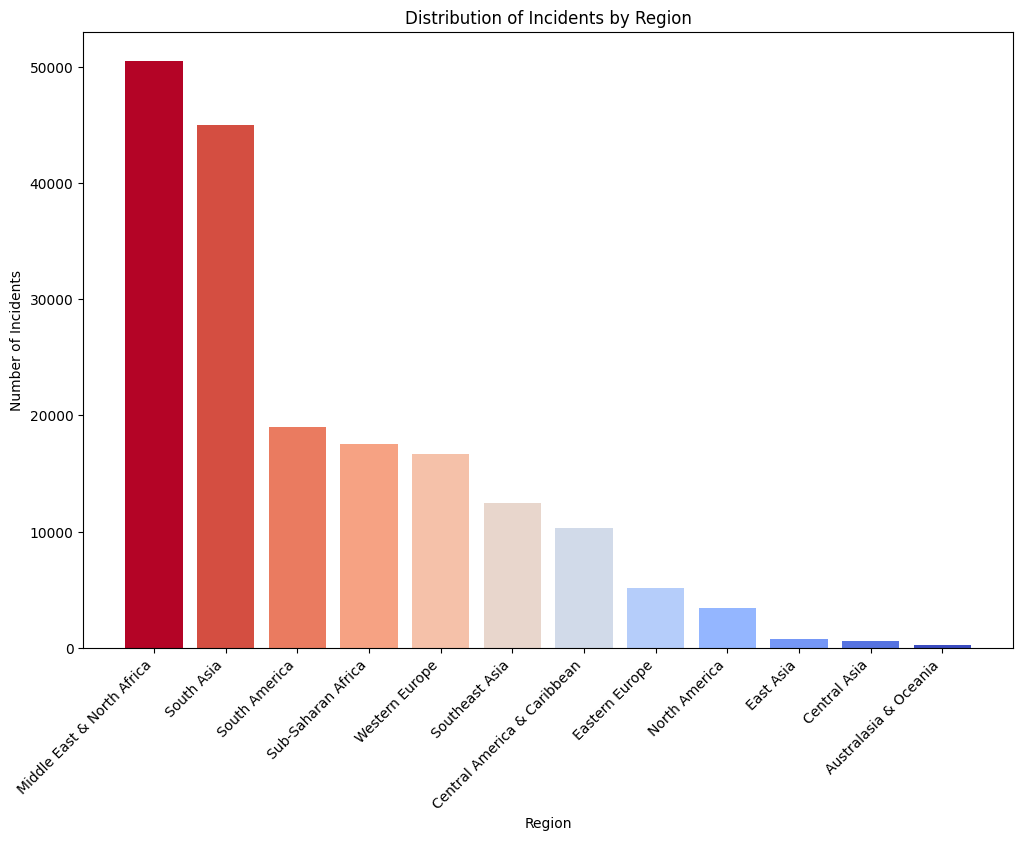

In [186]:
import matplotlib.pyplot as plt
import numpy as np

# Get the counts of each region
region_counts = gtd_df['Region'].value_counts()

# Create a color map from red (high) to blue (low)
colors = plt.cm.coolwarm(np.linspace(1, 0, len(region_counts)))  # Invert color mapping

# Sort the region counts in descending order to apply color mapping
sorted_counts = region_counts.sort_values(ascending=False)
sorted_colors = plt.cm.coolwarm(np.linspace(1, 0, len(sorted_counts)))  # Apply the inverted color map

# Create the bar plot
plt.figure(figsize=(12, 8))
bars = plt.bar(sorted_counts.index, sorted_counts.values, color=sorted_colors)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Incidents')
plt.title('Distribution of Incidents by Region')

# Rotate x-axis labels diagonally to avoid overlap
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [187]:
# Chart - 1 visualization code
#'Plot Map of Total number of attacks (1970-2017)-Country Wise'
# Create a new DataFrame with only the 'Country' and 'Year' columns for ploting map
gtd_map_df = gtd_df[['Country', 'Year']]

# Group by Country and count the number of attacks
terr = gtd_map_df.groupby('Country', as_index=False).size()
# Rename the 'size' column to 'Attacks' BEFORE creating the choropleth map
terr = terr.rename(columns={'size': 'Attacks'})

# Create the choropleth map
fig = px.choropleth(
    terr,
    locations='Country',
    locationmode='country names',
    color='Attacks',
    hover_name='Country',
    projection='orthographic',
    title='Total number of attacks (1970-2017)-Country Wise',
    labels={'Attacks': 'Number of Attacks'}
)

# Increase the size of the map
fig.update_layout(
    autosize=False,
    width=1200,  # Set the desired width
    height=800   # Set the desired height
)

#Plot the final map
fig.show()

In [188]:
#Class for Visualization.
class TerrorismVisualization:
    def __init__(self, df):
        """Initialize with DataFrame."""
        self.df = df

    def incidents_by_year(self):
        """Plot number of incidents year-wise."""
        try:
            data = self.df.groupby('Year').size()

            fig = go.Figure()
            fig.add_trace(go.Scatter(
                x=data.index,
                y=data.values,
                mode='lines+markers',
                marker=dict(color='black', size=10),
                line=dict(color='black'),
                text=[f'Year: {year}<br>Incidents: {num}' for year, num in zip(data.index, data.values)],
                hoverinfo='text'
            ))

            fig.update_layout(
                title='Number of Incidents Year wise',
                xaxis_title='Year',
                yaxis_title='Number of Incidents',
                xaxis=dict(tickangle=45),
                plot_bgcolor='slategrey',
                paper_bgcolor='lightsteelblue',
                template='plotly_white'
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

    def attacks_by_country(self):
        """Plot map of total number of attacks by country."""
        try:
            gtd_map_df = self.df[['Country', 'Year']]
            terr = gtd_map_df.groupby('Country', as_index=False).size()
            terr = terr.rename(columns={'size': 'Attacks'})

            fig = px.choropleth(
                terr,
                locations='Country',
                locationmode='country names',
                color='Attacks',
                hover_name='Country',
                projection='orthographic',
                title='Total number of attacks (1970-2017)-Country Wise',
                labels={'Attacks': 'Number of Attacks'}
            )

            fig.update_layout(
                autosize=False,
                width=1200,
                height=800
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

    def attacks_by_region(self):
        """Plot bar chart of attacks by region."""
        try:
            region_counts = self.df['Region'].value_counts().reset_index()
            region_counts.columns = ['Region', 'Number of Attacks']

            fig = px.bar(
                region_counts,
                x='Region',
                y='Number of Attacks',
                color='Number of Attacks',
                color_continuous_scale=px.colors.sequential.Plasma,
                title='Attacks by Region',
                labels={'Number of Attacks': 'Number of Attacks'},
                text='Number of Attacks'
            )

            fig.update_layout(
                xaxis_title='Region',
                yaxis_title='Number of Attacks',
                xaxis_tickangle=-45,
                coloraxis_colorbar_title='Number of Attacks'
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")

    def attack_types(self):
        """Plot pie chart for attack types (Type 1)."""
        try:
            attack_type_counts = self.df['Attack Type 1'].value_counts().reset_index()
            attack_type_counts.columns = ['Attack Type 1', 'Number of Attacks']

            fig = px.pie(
                attack_type_counts,
                names='Attack Type 1',
                values='Number of Attacks',
                title='Types of Attack. Type-1',
                labels={'Number of Attacks': 'Number of Attacks'},
                template='plotly_white'
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")


    def incidents_and_unknowns_by_year(self):
        """Plot incidents and unknown attackers by year with overlapping bars."""
        try:
            # Get data for incidents and unknown attackers
            attacks_per_year = self.df.groupby('Year').size()
            unknown_counts_per_year = self.df[self.df['Group Name 1'] == 'Unknown'].groupby('Year').size()
            unknown_counts_per_year = unknown_counts_per_year.reindex(attacks_per_year.index, fill_value=0)
            percentages = (unknown_counts_per_year / attacks_per_year * 100).fillna(0)

            # Create the figure
            fig = go.Figure()

            # Add bar chart for total incidents
            fig.add_trace(go.Bar(
                x=attacks_per_year.index,
                y=attacks_per_year.values,
                name='Total Incidents',
                marker_color='blue',
                opacity=0.6,
                text=[f'Year: {year}<br>Total Incidents: {count}' for year,count in zip(attacks_per_year.index, attacks_per_year.values)],#
                texttemplate='%{text}',
                textposition='inside'
            ))

            # Add overlapping bar chart for unknown attackers count
            fig.add_trace(go.Bar(
                x=unknown_counts_per_year.index,
                y=unknown_counts_per_year.values,
                name='Unknown Attackers Count',
                marker_color='red',
                opacity=0.8,
                text=[f'Year: {year}<br>Incidents with unknown attackers: {unknown}<br>Percentage: {perc:.1f}%' for year, unknown, perc in zip(unknown_counts_per_year.index, unknown_counts_per_year.values, percentages)],
                texttemplate='%{text}',
                textposition='inside'
            ))

            # Update layout
            fig.update_layout(
                title='Number of Incidents and Unknown Attackers per Year',
                xaxis_title='Year',
                yaxis_title='Number of Incidents',
                barmode='overlay',  # Overlay bars on top of each other
                yaxis=dict(range=[0, max(attacks_per_year.max(), unknown_counts_per_year.max()) * 1.1]),  # Adjust range as needed
                legend_title='Legend'
            )

            fig.show()
        except Exception as e:
            print(f"Error occurred: {e}")


gtd_viz = TerrorismVisualization(gtd_df)

# Usage example:

#gtd_viz.incidents_by_year()
#gtd_viz.attacks_by_country()
#gtd_viz.attacks_by_region()
#gtd_viz.attack_types()
#gtd_viz.attack_target_heatmap()
#gtd_viz.plot_attacks_by_group()

In [189]:
gtd_viz.incidents_and_unknowns_by_year()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [190]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [191]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [192]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [193]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [194]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [195]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [196]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [197]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [198]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [199]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [200]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [201]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [202]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***